June: Checking the profile along the canyon axis.

In [22]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_idealized
import functions_plot

# Bathymetry

Loads the file for either the Stereographic or Geographic projection of the Arctic Ocean (IBCAO) and returns the file's data for x, y, and z. 

In [23]:
xs, ys, zs = functions_plot.get_variables('S')

# Function for canyon axis

In [24]:
def find_points_diagonal(x1, y1, x2, slope):
    '''Finds coordinates along any line in the
    stereographic projection given point 1 (x1, y1),
    the x2 of point 2, and the slope of the line.
    x2 needs to be bigger(rightward).
    '''
    list_x = np.arange(x1, x2 + 500, 500)
    list_y = np.zeros_like(list_x)
    list_y[:] = (slope * (list_x[:] - x1)) + y1
    list_y[:] = np.round(list_y[:]/500.0)*500.0
    return list_x, list_y

def find_distance(p_one, p_two):
    ''' Finds the distance between two points.
    This is used to find the various canyon
    dimensions, such as widths and cross and along
    shore distances.
    '''
    xmax = abs(p_one[0])
    xmin = abs(p_two[0])
    ymax = p_one[1]
    ymin = p_two[1]
    dist = np.sqrt((xmax - xmin)**2 + (ymax - ymin)**2)
    return dist

# Real canyon

In [25]:
cst = [-1538000, 1705000]
x_cst = cst[0]; y_cst = cst[1]
z_cst = zs[np.where(ys==y_cst), np.where(xs==x_cst)][0][0]

fC = [-1415000, 1622500]
x_baseR = fC[0]; y_baseR = fC[1]
z_baseR = zs[np.where(ys==y_baseR), np.where(xs==x_baseR)][0][0]

wlC = [-1560000, 1720000]
x_wallR = wlC[0]; y_wallR = wlC[1]
z_wallR = zs[np.where(ys==y_wallR), np.where(xs==x_wallR)][0][0]

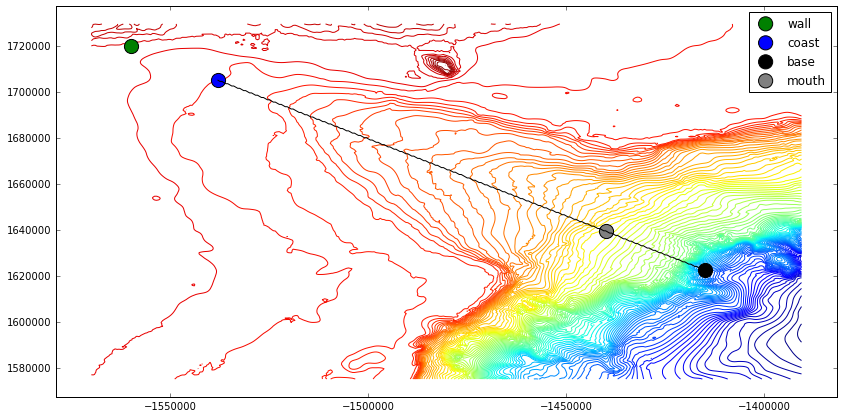

In [38]:
xl=-1570000; xr=-1390000; yb=1575000; yt=1730000
xn, yn, zn = functions_plot.def_regionS(xl, xr, yb, yt)

fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.contour(xn, yn, zn, 100, zorder=1)

ax.scatter(x_wallR, y_wallR, s=200, c='g', zorder=2, label='wall')
ax.scatter(x_cst, y_cst, s=200, c='b', zorder=2, label='coast')
ax.scatter(x_baseR, y_baseR, s=200, c='k', zorder=2, label='base')

# load full notebook before these lines
ax.scatter(x_mouth_R, y_mouth_R, s=200, c='gray', zorder=2, label='mouth')
ax.plot(x_axis, y_axis, c='k')

ax.legend(scatterpoints=1)

# Ideal canyon

In [27]:
xsize, ysize, x_wall, y_wall = 238, 178, 547219.33445374772, 406382.26879306574

x_wall, y_wall, w_break, w_mid, w_head, cR, L, p,\
y_coast, y_head, y_break, y_pointA, y_pointB, y_paral, y_base,\
fluid_depth, z_bottom, z_paral, z_pointA, z_pointB, z_break, z_coast = functions_idealized.Mackenzie_measurements(x_wall, y_wall)

x, y, y_edge, X, Y = functions_idealized.set_domain_grid(xsize, ysize, x_wall, y_wall)

z_ideal = functions_idealized.make_topo_smooth(y_edge, y_base, y_paral, y_pointA, y_pointB, y_break, y_head, y_coast,
                           cR, L, p, x, x_wall, w_break, w_mid, w_head,
                           fluid_depth, z_bottom, z_paral, z_pointA, z_pointB, z_break, z_coast)

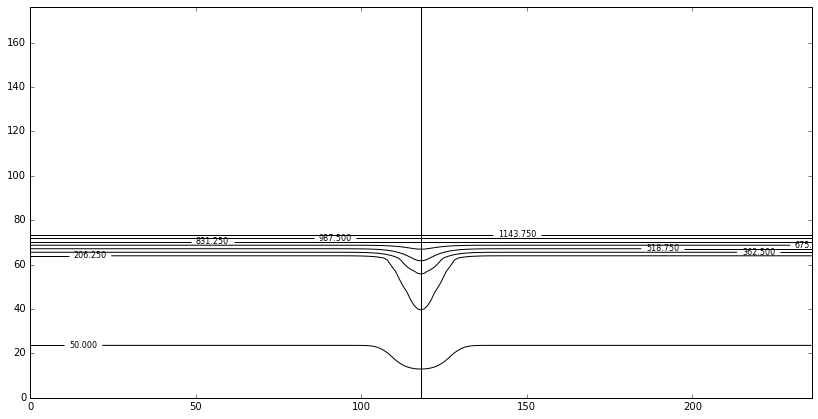

In [39]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
levels = np.linspace(50, fluid_depth, 9)
c = ax.contour(z_ideal, levels = levels, colors='k')
ax.clabel(c, inline=1, fontsize=8)
mid_ideal = int(z_ideal.shape[1]/2)
ax.axvline(mid_ideal, c='k')

# Canyon axis

coast:  26627.05391139997 40.0
base:  174731.93755 1300.0
distance (coast/base):  148104.88363860003
distance (coast/wall):  26627.05391139997
distance (wall/mouth):  143496.563839 , mouth depth: 527.127002735


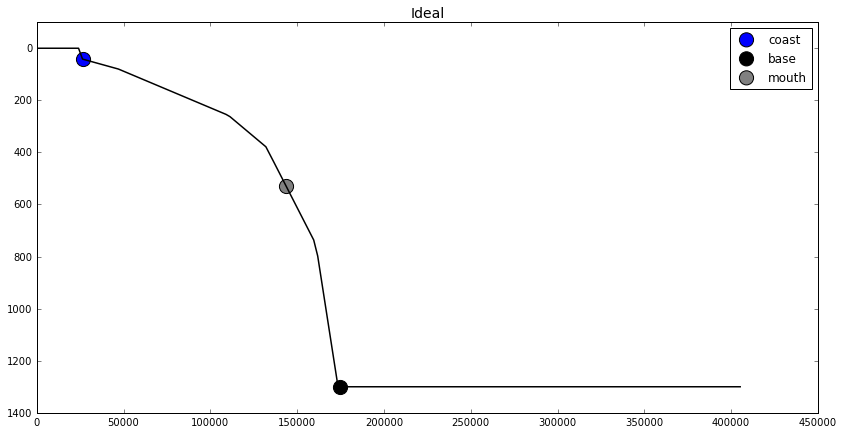

In [29]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.set_title('Ideal', fontsize=14)
ax.set_ylim([1400,-100]); ax.set_xlim([0,450000])
ax.plot(Y[:, mid_ideal], z_ideal[:, mid_ideal], c='k', lw=1.5)
ax.scatter(y_wall - y_coast, fluid_depth - z_coast, s=200, c='b', label='coast')
ax.scatter(y_wall - y_base, fluid_depth, s=200, c='k', label='base')

print('coast: ', y_wall - y_coast, fluid_depth - z_coast)
print('base: ', y_wall - y_base, fluid_depth)
print('distance (coast/base): ', y_coast - y_base)
print('distance (coast/wall): ', y_wall - y_coast)

ind_plane = np.argmin(np.abs(z_ideal[:,0] - 80))
x_mouth_I = X[ind_plane, mid_ideal]
y_mouth_I = Y[ind_plane, mid_ideal]
z_mouth_I = z_ideal[ind_plane, mid_ideal]
ax.scatter(y_mouth_I, z_mouth_I, s=200, c='gray', label='mouth')
ax.legend(scatterpoints=1)

print('distance (wall/mouth): ', y_mouth_I, ', mouth depth:', z_mouth_I)

coast:  1705000 -39.5899
base:  1622500 -1316.06
distance (coast/base):  148105.536696
distance (coast/wall):  26627.0539114
distance (coast/mouth):  144500.0 , mouth depth: -528


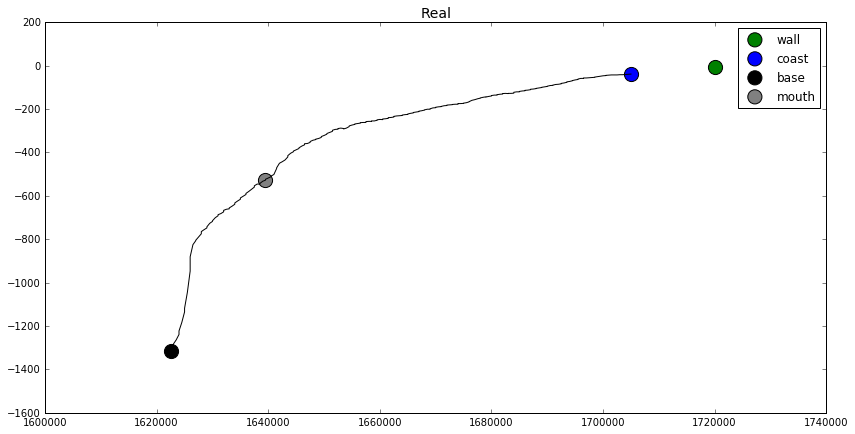

In [33]:
slope = (y_baseR - y_cst) / (x_baseR - x_cst)

x_axis, y_axis = find_points_diagonal(x_cst, y_cst, x_baseR, slope)

z_axis = np.zeros_like(x_axis)
for i in np.arange(len(x_axis)):
    z_axis[i] = zs[np.where(ys==y_axis[i]), np.where(xs==x_axis[i])][0][0]

fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.set_title('Real', fontsize=14)
ax.plot(y_axis, z_axis, c='k')
ax.scatter(y_wallR, z_wallR, s=200, c='g', label='wall')
ax.scatter(y_cst, z_cst, s=200, c='b', label='coast')
ax.scatter(y_baseR, z_baseR, s=200, c='k', label='base')

print('coast: ', y_cst, z_cst)
print('base: ', y_baseR, z_baseR)
print('distance (coast/base): ', find_distance(cst, fC))
print('distance (coast/wall): ', find_distance(wlC, cst))

ind_mouth_R_test = np.argmin(np.abs(-1*z_axis - z_mouth_I))
x_mouth_R = x_axis[ind_mouth_R_test]
y_mouth_R = y_axis[ind_mouth_R_test]
z_mouth_R = z_axis[ind_mouth_R_test]
ax.scatter(y_mouth_R, z_mouth_R, s=200, c='gray', label='mouth')
ax.legend(scatterpoints=1)

print('distance (coast/mouth): ', find_distance(wlC, [x_mouth_R, y_mouth_R]), ', mouth depth:', z_mouth_R)